In [1]:
from pyss3 import SS3
from pyss3.util import Dataset, Evaluation, span
from pyss3.server import Live_Test

from sklearn.metrics import accuracy_score

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

plt.style.use('bmh') # set up matplotlib style 

%matplotlib inline

In [3]:
!unzip -u train.csv.zip -d toxic_comments/train

Archive:  train.csv.zip
  inflating: toxic_comments/train/train.csv  


In [4]:
!unzip -u test.csv.zip -d toxic_comments/test

Archive:  test.csv.zip
  inflating: toxic_comments/test/test.csv  


In [3]:
frame = pd.read_csv('toxic_comments/train/train.csv')

In [4]:
frame.head()

id    target                                       comment_text  \
0  59848  0.000000  This is so cool. It's like, 'would you want yo...   
1  59849  0.000000  Thank you!! This would make my life a lot less...   
2  59852  0.000000  This is such an urgent design problem; kudos t...   
3  59855  0.000000  Is this something I'll be able to install on m...   
4  59856  0.893617               haha you guys are a bunch of losers.   

   severe_toxicity  obscene  identity_attack   insult  threat  asian  atheist  \
0         0.000000      0.0         0.000000  0.00000     0.0    NaN      NaN   
1         0.000000      0.0         0.000000  0.00000     0.0    NaN      NaN   
2         0.000000      0.0         0.000000  0.00000     0.0    NaN      NaN   
3         0.000000      0.0         0.000000  0.00000     0.0    NaN      NaN   
4         0.021277      0.0         0.021277  0.87234     0.0    0.0      0.0   

   ...  article_id    rating  funny  wow  sad  likes  disagree  \
0  ...        2006  rejected      0    0    0      0         0   
1  ...        2006  rejected      0    0    0      0         0   
2  ...        2006  rejected      0    0    0      0         0   
3  ...        2006  rejected      0    0    0      0         0   
4  ...        2006  rejected      0    0    0      1         0   

   sexual_explicit  identity_annotator_count  toxicity_annotator_count  
0              0.0                         0                         4  
1              0.0                         0                         4  
2              0.0                         0                         4  
3              0.0                         0                         4  
4              0.0                         4                        47  

[5 rows x 45 columns]

## Explanatory data analysis

### Toxic/non-toxic frame

The data also has several additional toxicity subtype attributes. Models do not need to predict these attributes for the competition, they are included as an additional avenue for research. Subtype attributes are:

- severe_toxicity;
- obscene;
- threat;
- insult;
- identity_attack;
- sexual_explicit.

In [5]:
severe_toxicity = frame['severe_toxicity'].to_list()
obscene = frame['obscene'].to_list()
threat = frame['threat'].to_list()
insult = frame['insult'].to_list()
identity_attack = frame['identity_attack'].to_list()
sexual_explicit = frame['sexual_explicit'].to_list()

In [6]:
attributes = [severe_toxicity,
obscene,
threat,
insult,
identity_attack,
sexual_explicit]

labels = ['severe_toxicity', 'obscene', 'threat',
'insult', 'identity_attack', 'sexual_explicit']

Attributes distribution - both toxic and non-toxic comments


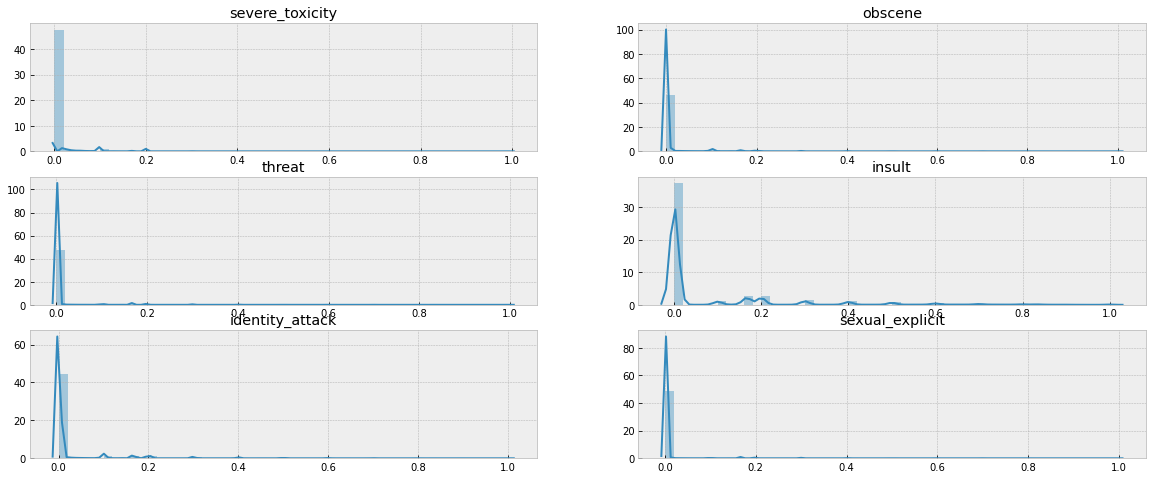

In [7]:
fig=plt.figure(figsize=(20, 8))

columns = 2
rows = 3
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i+1)
    ax = sns.distplot(attributes[i])
    ax.set_title(labels[i])
print('Attributes distribution - both toxic and non-toxic comments')
plt.show()

In [8]:
print('Serve toxicity examples:')
print([sum(x>0.5 for x in severe_toxicity)])
print('Not Serve toxicity examples:')
print([sum(x<=0.5 for x in severe_toxicity)])

print('Obscene examples:')
print([sum(x>0.5 for x in obscene)])
print('Not obscene examples:')
print([sum(x<=0.5 for x in obscene)])

print('Threat examples:')
print([sum(x>0.5 for x in threat)])
print('Not threat examples:')
print([sum(x<=0.5 for x in threat)])

print('Insult examples:')
print([sum(x>0.5 for x in insult)])
print('Not Insult examples:')
print([sum(x<=0.5 for x in insult)])

print('Identity attack examples:')
print([sum(x>0.5 for x in identity_attack)])
print('Identity attack examples:')
print([sum(x<=0.5 for x in identity_attack)])

print('Sexual explicit attack examples:')
print([sum(x>0.5 for x in sexual_explicit)])
print('Sexual explicit examples:')
print([sum(x<=0.5 for x in sexual_explicit)])

Serve toxicity examples:
[8]
Not Serve toxicity examples:
[1804866]
Obscene examples:
[7648]
Not obscene examples:
[1797226]
Threat examples:
[2793]
Not threat examples:
[1802081]
Insult examples:
[79887]
Not Insult examples:
[1724987]
Identity attack examples:
[7633]
Identity attack examples:
[1797241]
Sexual explicit attack examples:
[3119]
Sexual explicit examples:
[1801755]


### Toxic frame only

In [9]:
frame['is_toxic'] = frame['target'].apply(lambda toxic : +1 if toxic >= 0.5 else 0)

In [10]:
toxic_frame = frame[frame['is_toxic'] == 1]

In [11]:
severe_toxicity = toxic_frame['severe_toxicity'].to_list()
obscene = toxic_frame['obscene'].to_list()
threat = toxic_frame['threat'].to_list()
insult = toxic_frame['insult'].to_list()
identity_attack = toxic_frame['identity_attack'].to_list()
sexual_explicit = toxic_frame['sexual_explicit'].to_list()

In [12]:
attributes = [severe_toxicity,
obscene,
threat,
insult,
identity_attack,
sexual_explicit]

labels = ['severe_toxicity', 'obscene', 'threat',
'insult', 'identity_attack', 'sexual_explicit']

Attributes distribution - toxic comments only


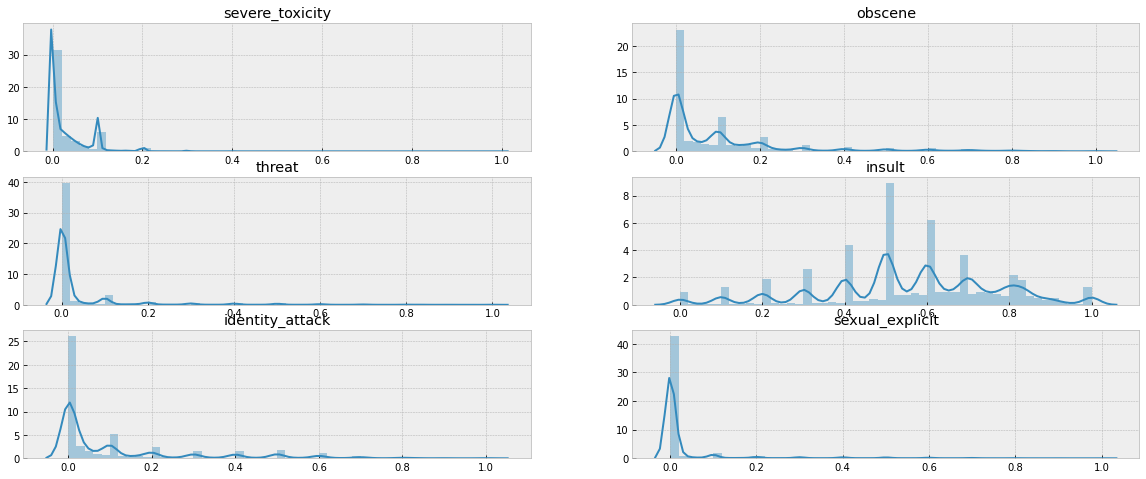

In [13]:
fig=plt.figure(figsize=(20, 8))

columns = 2
rows = 3
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns, i+1)
    ax = sns.distplot(attributes[i])
    ax.set_title(labels[i])
print('Attributes distribution - toxic comments only')
plt.show()

In [14]:
print('Serve toxicity examples:')
print([sum(x>0.5 for x in severe_toxicity)])
print('Not Serve toxicity examples:')
print([sum(x<=0.5 for x in severe_toxicity)])

print('Obscene examples:')
print([sum(x>0.5 for x in obscene)])
print('Not obscene examples:')
print([sum(x<=0.5 for x in obscene)])

print('Threat examples:')
print([sum(x>0.5 for x in threat)])
print('Not threat examples:')
print([sum(x<=0.5 for x in threat)])

print('Insult examples:')
print([sum(x>0.5 for x in insult)])
print('Not Insult examples:')
print([sum(x<=0.5 for x in insult)])

print('Identity attack examples:')
print([sum(x>0.5 for x in identity_attack)])
print('Identity attack examples:')
print([sum(x<=0.5 for x in identity_attack)])

print('Sexual explicit attack examples:')
print([sum(x>0.5 for x in sexual_explicit)])
print('Sexual explicit examples:')
print([sum(x<=0.5 for x in sexual_explicit)])

Serve toxicity examples:
[8]
Not Serve toxicity examples:
[144326]
Obscene examples:
[7622]
Not obscene examples:
[136712]
Threat examples:
[2786]
Not threat examples:
[141548]
Insult examples:
[79676]
Not Insult examples:
[64658]
Identity attack examples:
[7542]
Identity attack examples:
[136792]
Sexual explicit attack examples:
[2962]
Sexual explicit examples:
[141372]


## Baseline Model

Text(0.5, 1.0, 'Toxic classes')

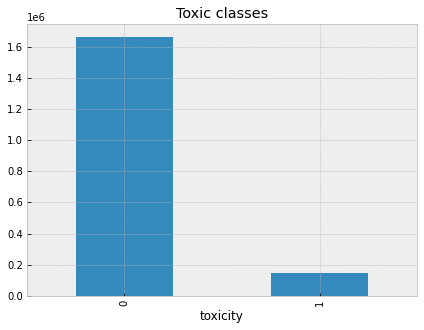

In [15]:
fig, ax = plt.subplots(figsize=(7,5))
frame['is_toxic'].value_counts().plot.bar() 
ax.set_xlabel('toxicity')
ax.set_title('Toxic classes')

###  Class-imbalance handling

In [16]:
# display the number of each class in percentage
(frame['is_toxic'].value_counts(normalize=True)*100).round(2)

0    92.0
1     8.0
Name: is_toxic, dtype: float64

Target variable is biased towards **non-toxic** comments.<br>
One approach is to make classes equal. 

In [17]:
"""
- split frame into parts based on positive/negarite sentiment
- undersample the major class to keep equal size for both
- create dataframe with balanced classes

"""
toxic_frame = frame[frame['is_toxic']==1]
nontoxic_frame = frame[frame['is_toxic']==0]

# estimate the size ratio
percentage = len(toxic_frame)/float(len(nontoxic_frame))
toxic = toxic_frame
nontoxic = nontoxic_frame.sample(frac=percentage) # use the same percentage
# append negative reviews sample to reduced positive frame 
data = toxic.append(nontoxic)

print("Positive class ratio:", len(nontoxic) / float(len(data)))
print("Negative class ratio:", len(toxic) / float(len(data)))
print("Entire frame length:", len(data))


Positive class ratio: 0.5
Negative class ratio: 0.5
Entire frame length: 288668


In [23]:
frame = data

Now, we can create a **baseline model** to perform classification using text of comments only.

In [25]:
frame['is_toxic'] = frame['target'].apply(lambda rate : "toxic" if rate >= 0.5 else "non-toxic")

In [26]:
data = frame[['comment_text', 'is_toxic']]

In [27]:
X = data['comment_text'].to_list()
y = data['is_toxic'].to_list()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

Now let’s create a new instance of the SS3 classifier.

In [29]:
clf = SS3()

In [30]:
s, l, p, _ = clf.get_hyperparameters()

print("Smoothness(s):", s)
print("Significance(l):", l)
print("Sanction(p):", p)

Smoothness(s): 0.45
Significance(l): 0.5
Sanction(p): 1


In [31]:
clf.train(X_train, y_train)

Training on 'toxic': 100%|██████████| 2/2 [00:41<00:00, 20.73s/it]    


Note that we don’t have to create any document-term matrix! we are using just the plain `x_train` documents.

SS3 learns a (spacial kind of) language model for each category and therefore it doesn’t need to create any document-term matrices. In fact, the very concept of “document” becomes irrelevant…

Now that the model has been trained, let’s test it using the documents in `x_test`. First, we will do it “in the sklearn’s own way” with.

In [32]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)

print("Accuracy was:", accuracy)

Classification: 100%|██████████| 72167/72167 [00:01<00:00, 59438.29it/s]  


Accuracy was: 0.7529757368326243


Classification: 100%|██████████| 72167/72167 [00:01<00:00, 61776.40it/s]



              precision    recall  f1-score   support

   non-toxic       0.88      0.59      0.71     36239
       toxic       0.69      0.92      0.79     35928

    accuracy                           0.75     72167
   macro avg       0.78      0.75      0.75     72167
weighted avg       0.78      0.75      0.75     72167


 accuracy: 0.753

[ updating evaluations cache ]


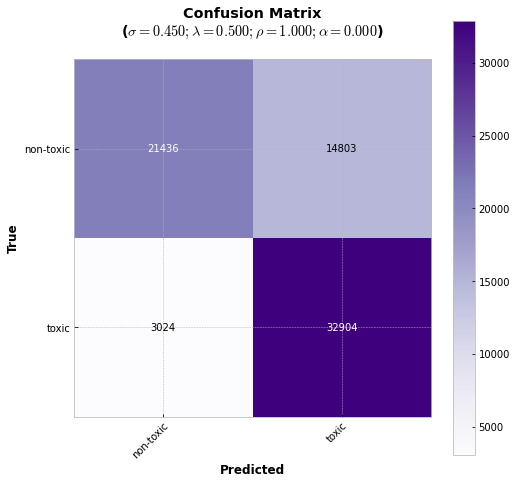

0.7529757368326243

In [33]:
Evaluation.test(clf, X_test, y_test)

**Note**: Previously, training on *imbalanced classes* resulted to higher error.

The advantage of using this built-in function is that with just a single line of code we get:

The performance measured in terms of all the well-known metrics (‘accuracy’, ‘precision’, ‘recall’, and ‘f1-score’).

A plot showing the obtained confusion matrix, and…

Since all the evaluations performed using the Evaluation class are permanently cached, if we ever perform this test again, the evaluation will be skipped and values will be retrieved from the cache storage (saving us a lot of time! when performing long evaluations).

As we can see, the performance doesn’t look bad using the default hyperparameter values, however, let’s now manually analyze what our model has actually learned by using the interactive “live test”.

Remember you can use the options to select “words” as the Description Level if you want to know based on what words, and to what degree, is making classification decisions.

### Improvement 1: Using `n_gram`

When calling the train we will pass an extra argument n_grams=3 to indicate we want SS3 to learn to recognize important words, bigrams, and 3-grams (If you’re curious and want to know how this is actually done by SS3, read the paper “t-SS3: a text classifier with dynamic n-grams for early risk detection over text streams”, preprint available here ).

In [34]:
# now, the argument of n_gram is 3 - feature is extended up to 3 words
clf = SS3(name="reviews-3grams")

clf.train(X_train, y_train, n_grams=3)  # <-- note the n_grams=3 argument here

Training on 'toxic': 100%|██████████| 2/2 [01:39<00:00, 49.98s/it]    


In [36]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_pred, y_test))

Classification: 100%|██████████| 72167/72167 [01:06<00:00, 1078.59it/s]

Accuracy: 0.7528648828411878


In [ ]:
Live_Test.run(clf, X_test, y_test)

### Improvement 2: Hyperparameter Optimization

In this section we will see how we can use PySS3’s Evaluation class to perform Hyperparameter optimization, which allows us to find better hyperparameter values for our models. <br>
To do this, we will perform grid searches using the `Evaluation.grid_search()` function.

In [39]:
clf = SS3(name="toxic-comments")

clf.train(X_train, y_train)

Training on 'toxic': 100%|██████████| 2/2 [00:42<00:00, 21.50s/it]    


The Evaluation.grid_search() takes, for each hyperparameter, the list of values to use in the search, for instance `s=[0.25, 0.5, 0.75, 1]` indicates you want the `grid_search` to try out evaluating the classifier using those 4 values for the sigma (s) hyperparameter. <br>
However, for simplicity, instead of using a manually crafted long list of values, we will use the span function we have imported from pyss3.util at the beginning of this notebook. <br>This function will create a list of values for us, giving a lower and upper bound, and the number of elements to be generated. For instance, if we want a list of 6 numbers between 0 and 1, we could use.

In [40]:
span(0, 1, 6)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

Thus, we will use the following values for each of the three hyperparameters.

In [43]:
s_vals=span(0.2, 0.8, 6)
l_vals=span(0.1, 2, 6)    # [0.1 , 0.48, 0.86, 1.24, 1.62, 2]
p_vals=span(0.5, 2, 6)    # [0.5, 0.8, 1.1, 1.4, 1.7, 2

In [45]:
# the search should take 2-3 minutes
best_s, best_l, best_p, _ = Evaluation.grid_search(
    clf, X_test, y_test,
    s=s_vals, l=l_vals, p=p_vals,
    tag="grid search (test)"  # <-- this is optional! >_<
)

Grid search: 100%|██████████| 216/216 [11:47<00:00,  3.28s/it]


In [46]:
print("The hyperparameter values that obtained the best Accuracy are:")
print("Smoothness(s):", best_s)
print("Significance(l):", best_l)
print("Sanction(p):", best_p)

The hyperparameter values that obtained the best Accuracy are:
Smoothness(s): 0.32
Significance(l): 0.86
Sanction(p): 2.0


And that’s how we found out that these hyperparameter values `(s=0.32, l=0.86, p=2.0)` were going to improve our classifier accuracy.

Finally, there is an optional (but recommended) step. To make sure the selected hyperparameters generalize well (i.e. are not overfitted to the test set), it is good practice to perform the grid search using k-fold cross-validation on the training set. Thus, we’ll use the k_fold argument of Evaluation.grid_search() to indicate we want to use (stratified) 10-fold cross-validation (k_fold=10), as follows.

In [48]:
# the search should take 5-8 minutes
best_s, best_l, best_p, _ = Evaluation.grid_search(
    clf, X_train, y_train,
    k_fold=10,
    s=s_vals, l=l_vals, p=2.0,
    tag="grid search (10-fold)"  # <-- remember this is optional! >_<
)

[fold 10/10] Grid search: 100%|██████████| 36/36 [01:32<00:00,  2.56s/it]        


In [49]:
print("The hyperparameter values that obtained the best accuracy are:")
print("Smoothness(s):", best_s)
print("Significance(l):", best_l)
print("Sanction(p):", best_p)

The hyperparameter values that obtained the best accuracy are:
Smoothness(s): 0.32
Significance(l): 0.86
Sanction(p): 2.0


The same hyperparameter values performed the best on the training data using 10-fold cross-validation. <br>
This means we can use the selected hyperparameter values `(s=0.32, l=0.86 and p=2.0)` safely.

### Training with best tuned parameters

In [54]:
clf_b = SS3(name="toxic-comments-best-param")
best_s, best_l, best_p, _ = clf.get_hyperparameters()

In [55]:
clf_b.train(X_train, y_train)

Training on 'toxic': 100%|██████████| 2/2 [00:40<00:00, 20.06s/it]    


In [56]:
y_pred = clf_b.predict(X_test)

accuracy = accuracy_score(y_pred, y_test)

print("Accuracy was:", accuracy)

Classification: 100%|██████████| 72167/72167 [00:01<00:00, 59559.31it/s]  

Accuracy was: 0.7529757368326243



              precision    recall  f1-score   support

   non-toxic       0.88      0.59      0.71     36239
       toxic       0.69      0.92      0.79     35928

    accuracy                           0.75     72167
   macro avg       0.78      0.75      0.75     72167
weighted avg       0.78      0.75      0.75     72167


 accuracy: 0.753



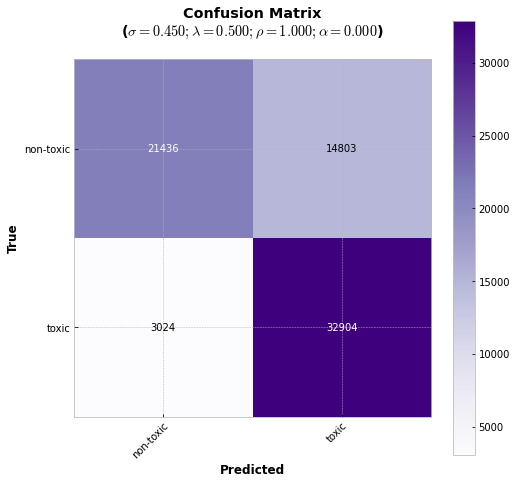

0.7529757368326243

In [57]:
Evaluation.test(clf_b, X_test, y_test)

In [64]:
Evaluation.plot()

True

In [65]:
Live_Test.run(clf_b, X_test, y_test)

## Futher reasearch

1. Use **metadata** for text - adding attributes to training data;
2. Attributes classification - performance for **multi-classification** on attributes (`severe_toxicity`, `obsence`and etc.)